# Hello Everyone!
- You can download the ".csv" file required for this study about the best games in the Google Play Store from the input section.
- In this study, which includes plenty of instructions and explanations, it is aimed to familiarize new Data Scientists with real-time projects.
- As entry-level analysts, we will make Exploratory Data Analysis (EDA) with the data set we have.
- Study's dataset has top 100 games of each category of games on Google Play Store along with their ratings and other data like price and number of installs.
- **I owe my respect and thanks to Mr. Kaan as our reference. (https://www.kaggle.com/kaanboke)**

#### Libraries
- Let's start with importing our necessary libraries.
    - As always, let's first import our ***Numpy*** and ***Pandas*** libraries and add our ***Plotly*** interactive library that we will use for Data Visualization.

#### Explanatory information about the Plotly library:
- ***Qick overview:*** The plotly Python library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases.
    - https://plotly.com/python/getting-started/

#### If your plotly module is not in your working environment, please download plotly and run the following codes.
- First --> ***pip install plotly==5.1.0***
- Then  --> ***import plotly.io as pio*** and ***pio.renderers.default = 'iframe'***

In [5]:
pip install plotly==5.1.0

Note: you may need to restart the kernel to use updated packages.


In [7]:
# I assume you already know these two indispensable libraries.
import pandas as pd
import numpy as np

# The Seaborn Library contains both data sets and is a very useful library for data visualization.
import seaborn as sns

# We can only use the matplotlib library for only plots for now.
import matplotlib.pyplot as plt

# Let's not forget to ignore our warning messages as well.
import warnings
warnings.filterwarnings('ignore')

# Let's import the plotly library
import plotly.io as pio
pio.renderers.default = 'iframe'

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

## Take a Look at The Basics

- Now we need to read our .csv file wihc we've downloade from input section.
- And let's take a look at the basics of the our dataset

In [9]:
df= pd.read_csv('android-games.csv')  # This code is bringing our .csv under the name of df variable.
df.head()  # As you know, we use .head() to check first 5 rows of our dataset. n = 5 rows is default, you can change.

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


- Now let's see how many rows and columns our dataset consists of.

In [11]:
df.shape  # As you can see we use our attribute without parentheses "()". First value is indicating row, the following one is column.
# So it means that, We have 1730 games (rows) and 15 different variables (columns) to work on.

(1730, 15)

- Now we are looking for a missing value in our dataset.

In [12]:
df.isnull().sum()
# WOAW, look!!! There is no missing value.Such a data_set is very rare.

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

- Now let's look at some information about our dataset with our .info() function.

In [14]:
df.info()
# You can see how many columns in different datatype at the bottom line. 
# "object" means strings, "int64" means integer, "float64" is float_nums, "bool" is boolean type.
# Be careful with the "installs" columns. Beacuse it has numbers but its type is object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


- The .describe() function gives us some basic statistical calculations for numeric columns. Let's see what is this .describe()?

In [15]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


#### Before moving on to the next step, here's a general summary of what we've done so far:
- Our dataset has games from different categories, different ratings and different number of installs.  
- 'installs' variable has a good numerical info to use. It would be a good idea to make adjustments on it to use it as a numerical variable
- There is no missing value, which is very good during the data preparation stage.
- 'Category' column is categorical variable, it would be good to see whether any significant differences among the categories of the games.
-  Numerical variables deserves special attention for further analysis.
- 'Paid' and 'Price' seems to have a lot on common. Needs to look in detail and if necessary drop one of them for simplicity.

## Necessary Adjustments

- We need to do some action on the "installs" column:
- Let's see how many variables are in it.

In [16]:
df.installs.value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

- Let's make it numeric by making adjustments in the "installs" column

In [18]:
# Let's create a function that expresses all its values in millions.
def millions (installs_values):
    if installs_values == "500.0 k":
        return "0.5 M"
    elif installs_values == '100.0 k':
        return '0.1 M'
    else:
        return installs_values
    
# Now, we are applying our func. into the our "install" column.
df["installs"]= df["installs"].apply(millions)

# Then we can replace "M" with an empty string while using .str
# After, we can use .split() to remove blanks from the edges
# Then finally, we can chenge it's type as float.
df["installs"]= df["installs"].str.replace( "M", "").str.strip().astype("float")

# So, right now the column name can be "installs_in_million"
df= df.rename(columns={"installs": "installs_in_million"})

# Let's see how many variables are in it, after adjustment.
df["installs_in_million"].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

- Let's see the price and paid columns and decide whether to go with both or drop one.
- Let's check  the prices of the games.

### Prices of The Games

In [19]:
df.price.value_counts()  # Look! Almost all the games are free

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

- Let's look at the inside of ***paid*** columns

In [20]:
df.paid.value_counts()  # Only the seven games are paid. 

False    1723
True        7
Name: paid, dtype: int64

- For this dataset, ***price*** column does not have much to offer for further analysis.
- So let's drop the ***price*** column.
- Dropping column, deleting rows are decisions to be taken very carefully and should based on analysis and domain knowledge

In [23]:
df.drop("price", axis = 1, inplace = True)
# we need to use .drop() function and let's look it's attribues which we used:
# first ve need to write our label name betweew quotation mark
# axis = 1 is telling us that it is a column
# if we need to make our drop permanent, we can use inplace or we can assign it to variable name

In [25]:
df.info()  # There is no price column anymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   category             1730 non-null   object 
 8   5 star ratings       1730 non-null   int64  
 9   4 star ratings       1730 non-null   int64  
 10  3 star ratings       1730 non-null   int64  
 11  2 star ratings       1730 non-null   int64  
 12  1 star ratings       1730 non-null   int64  
 13  paid                 1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


## Analyzing

- Now our dataset has a better view. Now we can move on to the analysis part.

- Let's first look at dataframe and the ***categories*** columns

### "category" column

In [26]:
df.head()

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [28]:
df.category.value_counts(normalize = True)  # normalize attributess shows us the percentages
# Almost all the categories looking like has same sizes.

GAME CARD            0.072832
GAME WORD            0.060116
GAME CASINO          0.057803
GAME PUZZLE          0.057803
GAME MUSIC           0.057803
GAME ARCADE          0.057803
GAME BOARD           0.057803
GAME ACTION          0.057803
GAME EDUCATIONAL     0.057803
GAME CASUAL          0.057803
GAME ROLE PLAYING    0.057803
GAME ADVENTURE       0.057803
GAME TRIVIA          0.057803
GAME SPORTS          0.057803
GAME STRATEGY        0.057803
GAME RACING          0.057803
GAME SIMULATION      0.057803
Name: category, dtype: float64

- let's create a plot to visualize our category sizes with ***matplotlib library***

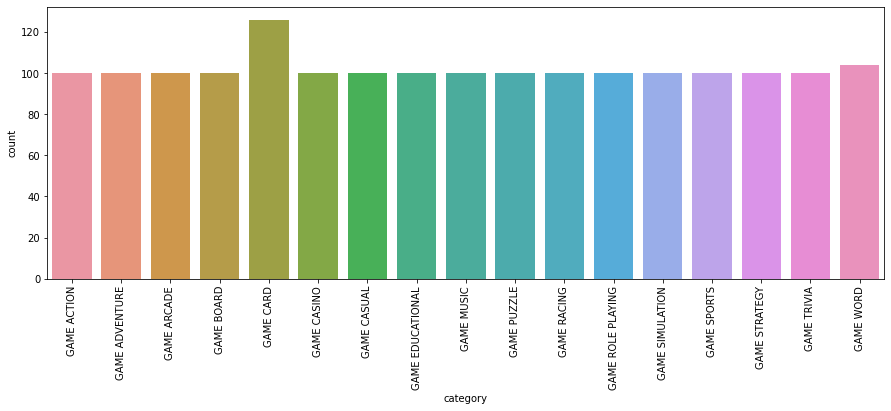

In [30]:
plt.figure(figsize=(15,5))  # figsize is specify our plot frame
sns.countplot(x = "category", data = df)
plt.xticks(rotation = 90);

- We can also use plotly library as we've import like **plotly.express as px**
- Then we can order the x axis: order by descending order 

In [31]:
fig = px.histogram(df, x="category", title='Game Categories')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- Let's visualize with ***seaborn library***

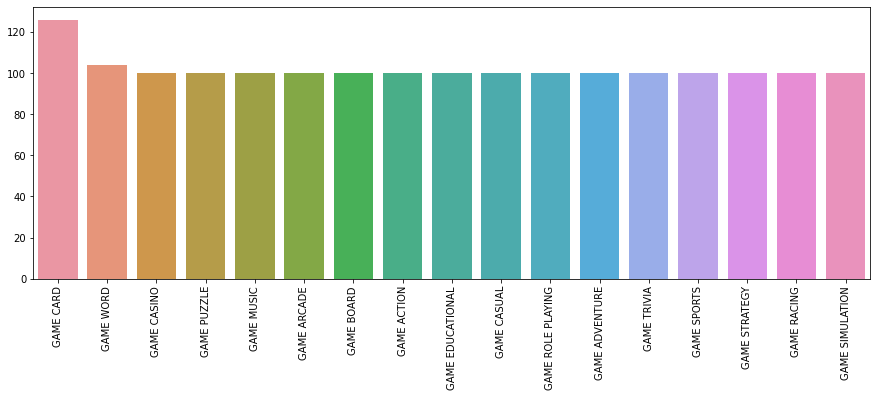

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.category.value_counts().index, y = df.category.value_counts().values, data = df)
plt.xticks(rotation = 90);

- Let's look atthe ***total ratings*** columns

### "total ratings" column

In [39]:
df["total ratings"].value_counts()

507250     4
648068     4
406124     4
1590733    4
106773     3
          ..
476520     1
540007     1
189798     1
474469     1
90110      1
Name: total ratings, Length: 1699, dtype: int64

In [40]:
df["total ratings"].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

- Let's visualize ***"total ratings"*** with histogram plot from ***seaborn lib.***

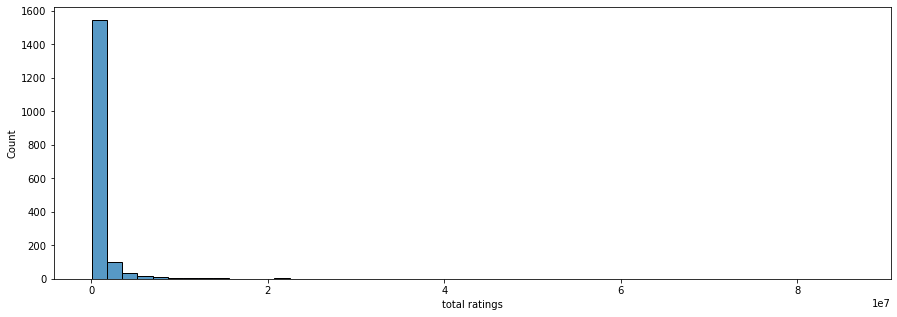

In [43]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="total ratings", bins = 50);  # exactly same --> sns.histplot(df['total ratings'], bins = 50);

- Let's use ***boxplot*** from ***seaborn*** for ***"total ratings"***

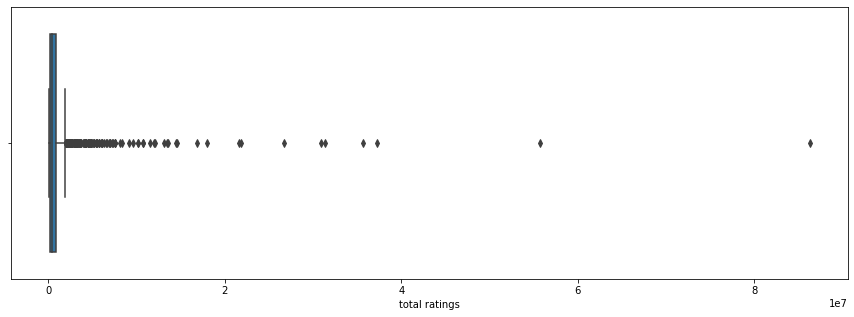

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="total ratings");

- now it's time for the ***plotly*** library

In [45]:
fig = px.histogram(df, x= 'total ratings', title='Total Ratings of the Games')
fig.show()

In [46]:
fig = px.box(df, x= 'total ratings', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

- As we have seen in the histogram, quite a lot of the ratings are in the 0 - 500.000 ratings range.
- On the other hand ve have quite a number of outliers, which increases mean and put it further away from the median.
- We have highly skewed distribution, more specifially right skewed distribution with the possible outliers on the maximum side of the distribution. So for further analysis it would be good to remember that.
- In these kinds of situations, it would be a good idea to look for the median based approach.
- Median value, instead of mean value, should be used for to get some insights from the distributions.

- Let's look at the ***Number of Game Install*** information using the ***"installs_in_million"*** columns

### "installs_in_million" column

In [47]:
df['installs_in_million'].describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_in_million, dtype: float64

In [48]:
df["installs_in_million"].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

- Yes, let's do the necessary analysis by preparing our visualizations as we did for the previous columns.

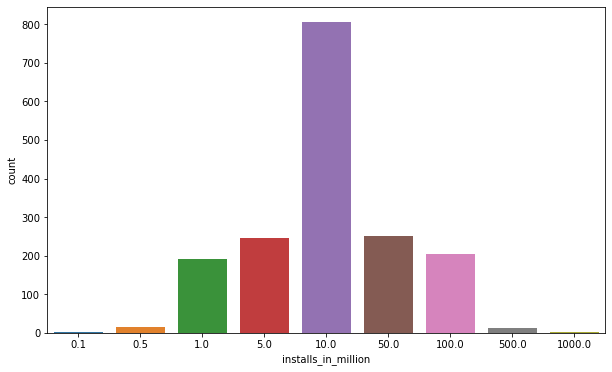

In [49]:
plt.figure(figsize = (10,6))
sns.countplot( x = df['installs_in_million']);

In [55]:
df.head()

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


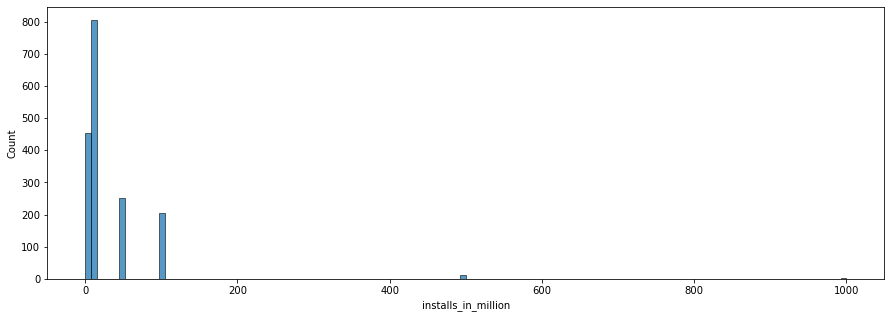

In [50]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="installs_in_million");

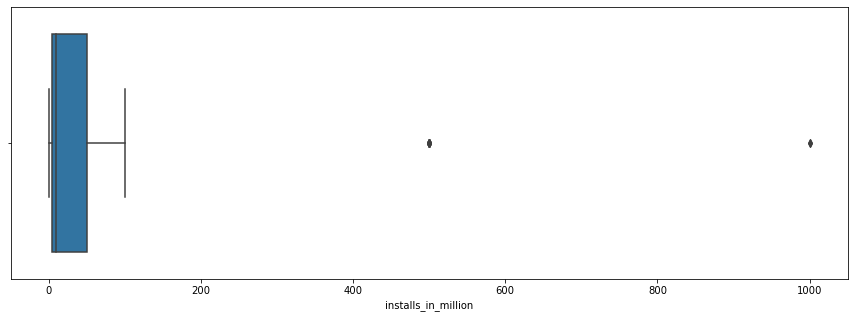

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="installs_in_million");

In [53]:
fig = px.histogram(df, x= 'installs_in_million', title='Number of Game Install in Millions')
fig.show()

In [54]:
fig = px.box(df, x= 'installs_in_million', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

- We have ***right skewed*** distribution as seen from the plots.
- **Candy Crush Saga** has ***1 Billion*** installs and **Clash of Clans** with ***500 Million*** installs shown in the box plot.
- And ***px.hsitogrms*** are showing us the example number of installs. In the dataset we have 2 different of 1 Billion install and 12 different of 500 Million installs. 
- As you know, ***outliers*** affect our means, distributions and statistical conclusions as usual.
- Difference between the ***mean()*** and ***median()*** values is really high (mean = 29.1M, median= 10M)
- So, it will be a good idea to use ***median based approach***.

### Paid & Free Games

In [58]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [57]:
df['paid'].value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

In [60]:
values = [7, 1723]  # creating values from .value_counts()
values

[7, 1723]

In [61]:
index = ["Paid", "Free"]  # creating indexes
index

['Paid', 'Free']

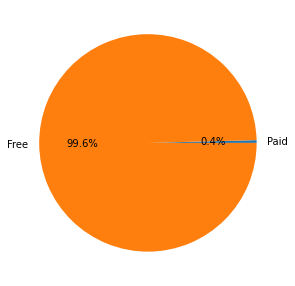

In [62]:
# creating matplotlib pieplot
plt.figure(figsize=(7,5))
y = values
mylabels = index
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')

plt.show()

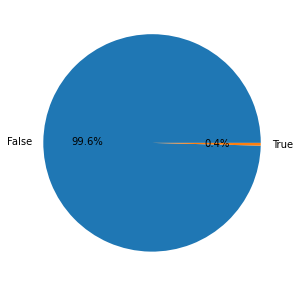

In [65]:
# exactly the same like before
plt.figure(figsize=(7,5))
y = df["paid"].value_counts().values
mylabels = df["paid"].value_counts().index
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')

plt.show()

In [63]:
# creating pieplot using with plotly library
paid_free= df['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

- Almost all of the games in this dataset (except 7 out of 1730) are free games.

- ***Let's go deeper into the data_set*** and work with the simultaneously ***"total ratings"*** and ***"category"***

### Total Ratings by Category

In [67]:
total_ratings_by_category = df.groupby("category")["total ratings"].mean().sort_values(ascending=False)
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME CASUAL          2.470866e+06
GAME STRATEGY        1.856570e+06
GAME ARCADE          1.793780e+06
GAME SPORTS          1.353829e+06
GAME RACING          1.139027e+06
GAME PUZZLE          9.466929e+05
GAME SIMULATION      9.341417e+05
GAME ADVENTURE       8.935617e+05
GAME ROLE PLAYING    7.087648e+05
GAME BOARD           4.457431e+05
GAME WORD            3.943603e+05
GAME CASINO          3.619031e+05
GAME CARD            3.326041e+05
GAME TRIVIA          2.982217e+05
GAME MUSIC           2.163020e+05
GAME EDUCATIONAL     1.529804e+05
Name: total ratings, dtype: float64

In [68]:
# looking with sorting attribute
total_ratings_by_category = df.groupby("category")["total ratings"].mean().sort_values(ascending=False)
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME CASUAL          2.470866e+06
GAME STRATEGY        1.856570e+06
GAME ARCADE          1.793780e+06
GAME SPORTS          1.353829e+06
GAME RACING          1.139027e+06
GAME PUZZLE          9.466929e+05
GAME SIMULATION      9.341417e+05
GAME ADVENTURE       8.935617e+05
GAME ROLE PLAYING    7.087648e+05
GAME BOARD           4.457431e+05
GAME WORD            3.943603e+05
GAME CASINO          3.619031e+05
GAME CARD            3.326041e+05
GAME TRIVIA          2.982217e+05
GAME MUSIC           2.163020e+05
GAME EDUCATIONAL     1.529804e+05
Name: total ratings, dtype: float64

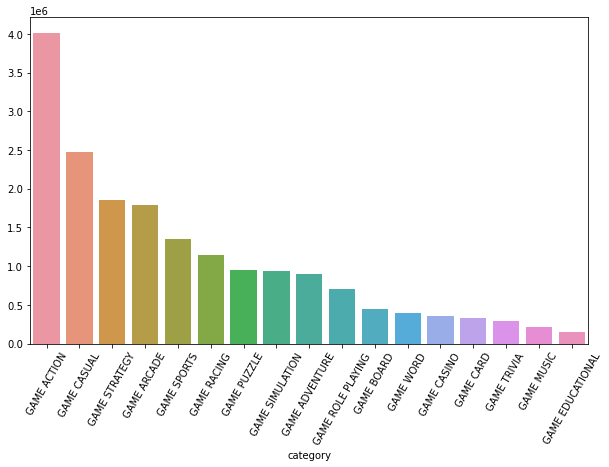

In [69]:
plt.figure(figsize=(10,6))

sns.barplot(data = df, x = total_ratings_by_category.index, y = total_ratings_by_category.values)
plt.xticks(rotation = 60);
plt.show()

In [70]:
fig = px.bar(total_ratings_by_category, x= total_ratings_by_category.index, y=total_ratings_by_category.values, labels={'y':'Total Ratings'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- ***So:*** Games in the categories of action, casual, strategy, arcade, sports scores much more than games in the education, music categories.

### Number of Game Installations by Game Category

In [71]:
install_by_category = df.groupby('category')['installs_in_million'].mean()
install_by_category

category
GAME ACTION          74.100000
GAME ADVENTURE       18.030000
GAME ARCADE          71.610000
GAME BOARD           21.230000
GAME CARD            12.484127
GAME CASINO           7.715000
GAME CASUAL          63.970000
GAME EDUCATIONAL     17.895000
GAME MUSIC           12.487000
GAME PUZZLE          36.210000
GAME RACING          46.750000
GAME ROLE PLAYING    14.080000
GAME SIMULATION      27.710000
GAME SPORTS          33.610000
GAME STRATEGY        23.910000
GAME TRIVIA           6.901000
GAME WORD            12.317308
Name: installs_in_million, dtype: float64

In [73]:
number_installations_by_category = df.groupby("category")["installs_in_million"].mean().sort_values(ascending=False)
number_installations_by_category

category
GAME ACTION          74.100000
GAME ARCADE          71.610000
GAME CASUAL          63.970000
GAME RACING          46.750000
GAME PUZZLE          36.210000
GAME SPORTS          33.610000
GAME SIMULATION      27.710000
GAME STRATEGY        23.910000
GAME BOARD           21.230000
GAME ADVENTURE       18.030000
GAME EDUCATIONAL     17.895000
GAME ROLE PLAYING    14.080000
GAME MUSIC           12.487000
GAME CARD            12.484127
GAME WORD            12.317308
GAME CASINO           7.715000
GAME TRIVIA           6.901000
Name: installs_in_million, dtype: float64

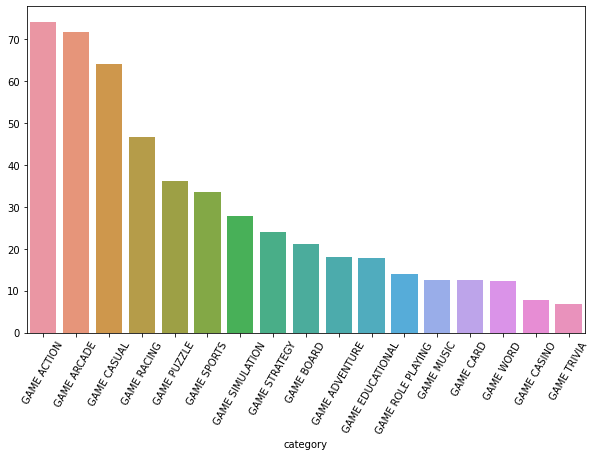

In [74]:
plt.figure(figsize=(10,6))

sns.barplot(data = df, x = number_installations_by_category.index, y = number_installations_by_category.values)
plt.xticks(rotation = 60);
plt.show()

In [75]:
fig = px.bar(install_by_category, x= install_by_category.index, y=install_by_category.values, labels={'y':'Install in Millions'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- ***So:*** Games in the action, arcade and casual categories are significantly more loaded than games in the trivia, casino and word categories.

### Comparison Between Ratings and Growth of Games For 30 Days

In [76]:
growth_by_category_30 = df.groupby('category')['growth (30 days)'].mean()
growth_by_category_30

category
GAME ACTION            18.808000
GAME ADVENTURE        259.101000
GAME ARCADE            58.924000
GAME BOARD             34.445000
GAME CARD             746.598413
GAME CASINO          2335.253000
GAME CASUAL            36.020000
GAME EDUCATIONAL      102.455000
GAME MUSIC             24.626000
GAME PUZZLE            44.362000
GAME RACING           207.103000
GAME ROLE PLAYING     209.979000
GAME SIMULATION        13.406000
GAME SPORTS           159.543000
GAME STRATEGY          18.281000
GAME TRIVIA          1079.680000
GAME WORD              22.433654
Name: growth (30 days), dtype: float64

In [78]:
fig = px.bar(growth_by_category_30, x= growth_by_category_30.index, y=growth_by_category_30, labels={'y':'Growth in 30 days'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- Despite the fact that the games in the action categories received higher ratings and were loaded more than the games in the other categories, the games in the casino category recorded more growth in 30 days.

### -Let's See If The Same is True For 60-Day Growth?

In [85]:
growth_by_category_60 = df.groupby('category')['growth (60 days)'].mean().sort_values(ascending=False)
growth_by_category_60

category
GAME BOARD           587.891000
GAME CARD            555.337302
GAME STRATEGY        435.440000
GAME ACTION          118.294000
GAME RACING           88.963000
GAME WORD             55.725000
GAME MUSIC            22.160000
GAME ARCADE           21.970000
GAME SIMULATION       20.196000
GAME CASUAL           14.812000
GAME EDUCATIONAL      14.748000
GAME PUZZLE           12.062000
GAME SPORTS            8.492000
GAME TRIVIA            6.180000
GAME ADVENTURE         6.084000
GAME ROLE PLAYING      3.037000
GAME CASINO            2.193000
Name: growth (60 days), dtype: float64

In [86]:
fig = px.bar(growth_by_category_60, x= growth_by_category_60.index, y=growth_by_category_60, labels={'y':'Growth in 60 days'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- No, the 60-day growth for games in the ***casino, adventure, role-playing*** categories is significantly lower than their 30-day growth.
- With the given data set we can only speculate about one thing, but we cannot make an analytical assumption based on the given data. We need more variables to explain the significant differences for some categories in 30-60 day growth.

- Lets' see ***top 5 ranked*** games in each category in details.

### Top 5 Ranked Games By Category
- Rank
- Title
- Category
- Total ratings
- Installs in million

In [87]:
top_ranked_games = df[df['rank']<6][['rank','title','category', 'total ratings', 'installs_in_million', '5 star ratings']]
top_ranked_games

,rank,title,category,total ratings,installs_in_million,5 star ratings
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988
3,4,Brawl Stars,GAME ACTION,17971552,100.0,13018610
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,GAME ACTION,14464235,500.0,9827328
...,...,...,...,...,...,...
1626,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,GAME WORD,2418119,10.0,2115189
1627,2,Word Cookies!®,GAME WORD,2250585,10.0,1679256
1628,3,Words of Wonders: Crossword to Connect Vocabulary,GAME WORD,1885400,100.0,1457939
1629,4,Words with Friends Classic: Word Puzzle Challenge,GAME WORD,1722914,50.0,971880


### Top 3 Games by Category and Their Total Ratings

In [88]:
fig = px.scatter(top_ranked_games, y= 'title', x='total ratings', 
                 hover_data = top_ranked_games[['category','rank']], color='category', 
                 title = "Top 5 Games by Their Total Ratings")
fig.show()

- As mentioned above, games in the action, casual, strategy,arcade, sports categories are getting considerably more ratings than, games in the educational, music categories.
- Same is true even for the top ranked games in these categories.

### Top 5 Games by Category and Their Installs in Millions

In [89]:
fig = px.scatter(top_ranked_games, y= 'title', x='installs_in_million', 
                 hover_data = top_ranked_games[['category','rank']], color='category', 
                 title = "Top 5 Games by Their Installations in Millions")
fig.show()

- As mentioned above, games in the action, arcade, and casual categories are loaded significantly more than games in the trivia, casino, and word categories.

- The same is true even for top ranked games in these categories.

### Top 5 Games by Category and Their 5 star ratings

In [90]:
fig = px.scatter(top_ranked_games, y= 'title', x='5 star ratings', 
                 hover_data = top_ranked_games[['category','rank']], color='category', 
                 title = "Top 5 Games by 5 Star Rankings")
fig.show()

- Games in the categories of action, casual, strategy, arcade also receive more 5-star ratings than games in the education, music categories.

- ***And Finally see the top 20 games***

### Top 20 Games

In [98]:
top_20 = df.sort_values(by='installs_in_million', ascending=False).head(20)  # you can also use .loc[:]
top_20

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
200,1,Subway Surfers,35665901,1000.0,4,0.5,1.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,False
626,1,Candy Crush Saga,31367945,1000.0,4,0.9,1.6,GAME CASUAL,23837448,4176798,1534041,486005,1333650,False
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
207,8,Temple Run,4816448,500.0,4,0.7,1.5,GAME ARCADE,3184391,438320,318164,204384,671187,False
1426,1,Clash of Clans,55766763,500.0,4,0.3,1.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,False
1026,1,Hill Climb Racing,10188038,500.0,4,0.4,0.8,GAME RACING,7148370,982941,607603,338715,1110407,False
1326,1,8 Ball Pool,21632735,500.0,4,1.2,630.8,GAME SPORTS,16281475,2268294,1017204,425693,1640067,False
630,5,Pou,11506051,500.0,4,0.2,0.5,GAME CASUAL,8175679,1051014,688712,346244,1244400,False
628,3,My Talking Angela,13050503,500.0,4,0.6,1.4,GAME CASUAL,9165205,1073761,636763,399662,1775110,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,GAME ACTION,28339753,2164478,1253185,809821,4709492,False


In [101]:
fig = px.bar(top_20, x= 'title', y='installs_in_million', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

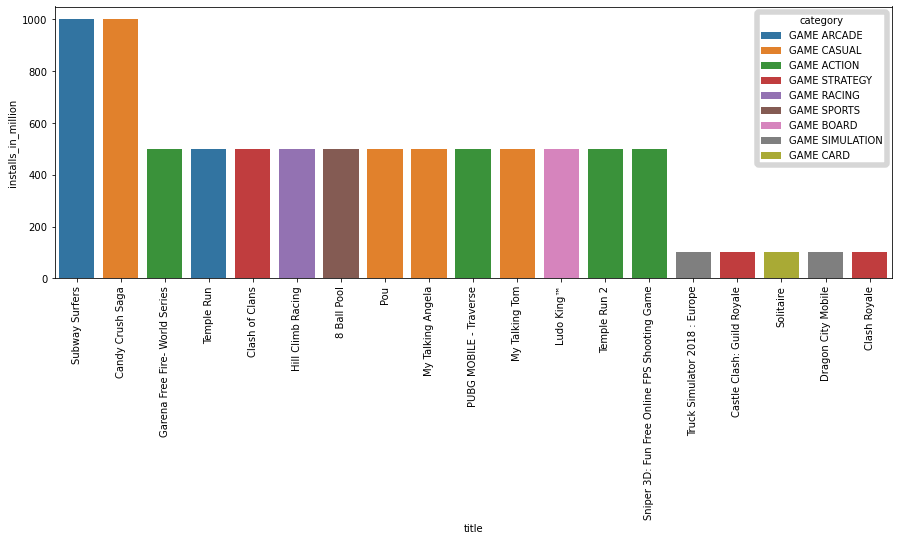

In [126]:
plt.figure(figsize=(15,5))
sns.barplot(data = top_20, x = "title", y = "installs_in_million", hue = "category", dodge = False)
plt.xticks(rotation = 90)
plt.show()

- Top 2 games have 1 Billion downloads.
- The following 12 games have 500 million downloads.

In [131]:
fig = px.bar(top_20, x= 'title', y='total ratings', hover_data = top_20[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- It is important to see that although Candy Crush Saga and Subway Surfers have 1 Billion installs, this does not automatically mean they will get the most total points.
- Garena Free Fire-World Series with 500M installs, also with over 86M total ratings.

- ***It was very enjoyable to use Mr. Kaan's dataset and share this detailed beginner-level user-friendly EDA with you. Thanks for your time.***